# Designing a K-means clustering algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
#reading data txt file
xs = []
ys = []
with open('Data.txt') as f:
     for line in f:
        x, y = line.split()
        xs.append(x)
        ys.append(y)
#converting from str to float        
for i in range(0,len(xs)):
    xs[i]=float(xs[i])
for i in range(0,len(ys)):
    ys[i]=float(ys[i])
    
#merging in one array
data=np.zeros((300,2))
for i in range(0,len(xs)):
    data[i][0]=xs[i]
    data[i][1]=ys[i]
#data array with labels
dataL=np.zeros((300,3))
for i in range(0,len(xs)):
    dataL[i][0]=xs[i]
    dataL[i][1]=ys[i]
    dataL[i][2]=0

In [3]:
#reading data2 txt files
xs2 = []
ys2 = []
with open('Data2.txt') as f:
     for line in f:
        x, y = line.split()
        xs2.append(x)
        ys2.append(y)
#converting from str to float        
for i in range(0,len(xs2)):
    xs2[i]=float(xs2[i])
for i in range(0,len(ys2)):
    ys2[i]=float(ys2[i])
    
#merging in one array
data2=np.zeros((30,2))
for i in range(0,len(xs2)):
    data2[i][0]=xs2[i]
    data2[i][1]=ys2[i]
#data array with labels
dataL2=np.zeros((30,3))
for i in range(0,len(xs2)):
    dataL2[i][0]=xs2[i]
    dataL2[i][1]=ys2[i]
    dataL2[i][2]=0

In [4]:
def initClusters(prev_cluster,data):
    l=0; #largest
    lpi=0; #largest point index
    for i in range(0,len(data)):
        dist = np.linalg.norm(prev_cluster - data[i])
        if(l<dist):
            l=dist
            lpi=i
    return data[lpi]

In [5]:
def labeling(c1c,c2c,c3c,data,dataL):
    l=0
    for i in range(0,len(data)):
        dist1=np.linalg.norm(c1c - data[i])
        dist2=np.linalg.norm(c2c - data[i])
        dist3=np.linalg.norm(c3c - data[i])
        if(dist1<dist2 and dist1<dist3):
            dataL[i][2]=1
        elif(dist2<dist1 and dist2<dist3):
            dataL[i][2]=2
        else:
            dataL[i][2]=3

In [6]:
def meanCalc(dataL,clus):
    totalx=0
    totaly=0
    n=0
    mean=np.zeros((2))
    for i in range(0,len(dataL)):
        if(dataL[i][2]==clus):
            totalx+=dataL[i][0]
            totaly+=dataL[i][1]
            n+=1
    if(n!=0):
        mean[0]=totalx/n
        mean[1]=totaly/n
    else:#not clustered
        mean=np.array([-1,-1])
    return mean

In [7]:
def minAverageDistance(mean1,mean2,mean3,data,dataL):
    dist1=0
    dist2=0
    dist3=0
    d1=0
    d2=0
    d3=0
    min=0;
    for i in range(0,len(data)):
        if(dataL[i][2]==1):
            dist1+=np.linalg.norm(mean1 - data[i])
            d1+=1
        elif(dataL[i][2]==2):
            dist2+=np.linalg.norm(mean2 - data[i])
            d2+=1
        else:
            dist3+=np.linalg.norm(mean3 - data[i])
            d3+=1
    avg1=dist1/d1
    avg2=dist2/d1
    avg3=dist3/d1
    avg=(avg1+avg2+avg3)/3
    return avg
#     if(avg1>avg2 and avg1>avg3):
#         min=avg1
#     elif(avg2>avg1 and avg2>avg3):
#         min=avg2
#     else:
#         min=avg3
#     return min

In [8]:
allMeans=np.zeros((100,6))#2 columns for each mean(x,y) 
minAvgDist=np.zeros(100)
m=0;
for i in range(0,100): 
    cluster1_center=random.choice(data)
    cluster2_center=initClusters(cluster1_center,data)
    cluster3_center=initClusters(cluster2_center,data)
    init=True
    flag=True
    notClus=False;
    while (flag==True): #this while loop classify each point to its specific cluster
        if(init==True):
            labeling(cluster1_center,cluster2_center,cluster3_center,data,dataL)
            init=False
        if(meanCalc(dataL,1)[0]==-1 or meanCalc(dataL,2)[0]==-1 or meanCalc(dataL,3)[0]==-1):
            notClus=True;
            break;
        else:
            prevmean1=meanCalc(dataL,1)
            prevmean2=meanCalc(dataL,2)
            prevmean3=meanCalc(dataL,3)
            labeling(prevmean1,prevmean2,prevmean3,data,dataL)
            mean1=meanCalc(dataL,1)
            mean2=meanCalc(dataL,2)
            mean3=meanCalc(dataL,3)
            if(prevmean1[0]==mean1[0] and prevmean2[0]==mean2[0] and prevmean3[0]==mean3[0] and prevmean1[1]==mean1[1] and prevmean2[1]==mean2[1] and prevmean3[1]==mean3[1]):
                flag=False
            else:
                labeling(mean1,mean2,mean3,data,dataL)
    if(notClus==True):
        allMeans[m]=-1
        m+=1
    else:
        minAvgDist[m]=minAverageDistance(mean1,mean2,mean3,data,dataL)
        allMeans[m][0]=mean1[0]
        allMeans[m][1]=mean1[1]
        allMeans[m][2]=mean2[0]
        allMeans[m][3]=mean2[1]
        allMeans[m][4]=mean3[0]
        allMeans[m][5]=mean3[1]
        m+=1
    
        


In [9]:
#The final output using the result that gives the minimum average distance between the points and the centers of their corresponding clusters
index=0;
min=minAvgDist[0]
for i in range(1,len(minAvgDist)):
    if(minAvgDist[i]<min and minAvgDist[i]>0 ):
        min=minAvgDist[i]
        index=i 
mean1[0]=allMeans[index][0]
mean1[1]=allMeans[index][1]
mean2[0]=allMeans[index][2]
mean2[1]=allMeans[index][3]
mean3[0]=allMeans[index][4]
mean3[1]=allMeans[index][5]
labeling(mean1,mean2,mean3,data,dataL)

In [28]:
print("best mean1=",+ mean1)
print("best mean2=",+ mean2)
print("best mean3=",+ mean3)

best mean1= [9.842299 9.966967]
best mean2= [20.29751 20.04698]
best mean3= [1.03035248 1.01326637]


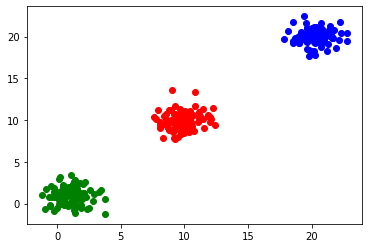

In [29]:
#plot after k means clustering
dataDF=pd.DataFrame(dataL,columns=['x','y','labels'])
for i in range(0,len(dataDF)):
    if(dataDF['labels'][i]==1):
        plt.scatter(dataDF.iloc[i][0], dataDF.iloc[i][1],color ="red")
    if(dataDF['labels'][i]==2):
        plt.scatter(dataDF.iloc[i][0], dataDF.iloc[i][1],color ="blue")
    if(dataDF['labels'][i]==3):
        plt.scatter(dataDF.iloc[i][0], dataDF.iloc[i][1],color ="green")
plt.show()

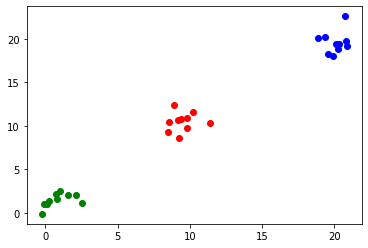

In [30]:
#testing
labeling(mean1,mean2,mean3,data2,dataL2)

dataDF2=pd.DataFrame(dataL2,columns=['x','y','labels'])
for i in range(0,len(dataDF2)):
    if(dataDF2['labels'][i]==1):
        plt.scatter(dataDF2.iloc[i][0], dataDF2.iloc[i][1],color ="red")
    if(dataDF2['labels'][i]==2):
        plt.scatter(dataDF2.iloc[i][0], dataDF2.iloc[i][1],color ="blue")
    if(dataDF2['labels'][i]==3):
        plt.scatter(dataDF2.iloc[i][0], dataDF2.iloc[i][1],color ="green")
plt.show()